In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [8]:
%cd /content/gdrive/My Drive/CS189
!pwd
from google.colab import files
mds_189 = files.upload()


/content/gdrive/My Drive/CS189
/content/gdrive/My Drive/CS189


Saving mds189.py to mds189 (6).py


In [0]:
import torch
from torch.utils import data
import pandas as pd
import random
import json
import numpy as np
from skimage import io, transform
from PIL import Image

class Mds189(data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, label_file, loader, transform):
        'Initialization'
        self.label_file = label_file
        self.loader = loader
        self.transform = transform
        self.label_map = ['reach','squat','pushup','inline',
                          'hamstrings','lunge','deadbug','stretch']
        self.data= pd.read_csv(self.label_file,header=None)

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.data)

    def map_label_to_int(self,y):
        'The labels need to be integers'
        label_map = {'reach_both': 0,        # the key frames are labeled with the side
                     'squat_both': 1,
                     'inline_left': 2,
                     'inline_right': 2,
                     'lunge_left': 3,
                     'lunge_right': 3,
                     'hamstrings_left': 4,
                     'hamstrings_right': 4,
                     'stretch_left': 5,
                     'stretch_right': 5,
                     'deadbug_left': 6,
                     'deadbug_right': 6,
                     'pushup_both': 7,
                     'reach': 0,            # the video frames don't have information about which side is moving 
                     'squat': 1,
                     'inline': 2,
                     'lunge': 3,
                     'hamstrings': 4,
                     'stretch': 5,
                     'deadbug': 6,
                     'pushup': 7,
                     'label': -1           # label is the placeholder in `videoframe_data_test.txt` for the kaggle frame labels
                    }
        return label_map[y]

    def __getitem__(self,idx):
        'Generates one sample of data'
        path,target = self.data.iloc[idx]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        movement = self.map_label_to_int(target)

        return sample,movement


ModuleNotFoundError: No module named 'mds189'

# **Execute the following cell to produce kaggle predictions.**

In [57]:

def results_to_csv(index, y_test):
  y_test = y_test.astype(str)
  index = index.astype(str)
  df = pd.DataFrame({'Id': index, 'Category': y_test})
  df.to_csv('submission.csv')

for t in predicted_list:
  predictions.append(t.item())
predictions = [p.cpu().numpy().tolist() for p in predicted_list]
submission = []
for i in predictions:
  submission.append(label_map[i])
concat_list = ['{:04d}.jpg,{:s}'.format(i,pred) for (i,pred) in enumerate(submission)]

id_list = ['{:04d}.jpg'.format(i) for (i, pred) in enumerate(submission)]


results_to_csv(np.array(id_list), np.array(submission))

        


[3, 6, 4, 2, 5, 5, 4, 5, 3, 0, 5, 5, 5, 5, 5, 5, 2, 1, 1, 7, 1, 1, 5, 4, 1, 1, 4, 6, 6, 0, 6, 1, 6, 5, 2, 1, 7, 0, 4, 5, 1, 4, 2, 6, 6, 6, 3, 7, 5, 2, 5, 5, 6, 1, 2, 2, 6, 3, 4, 3, 2, 6, 2, 5, 7, 5, 4, 1, 4, 4, 2, 6, 2, 2, 6, 1, 1, 4, 2, 3, 3, 2, 3, 1, 6, 5, 6, 2, 1, 4, 3, 4, 0, 2, 4, 5, 5, 6, 2, 6, 6, 2, 2, 2, 3, 7, 4, 4, 5, 3, 3, 6, 4, 3, 0, 0, 1, 7, 5, 6, 3, 4, 5, 2, 4, 1, 6, 3, 2, 3, 2, 1, 6, 7, 3, 5, 2, 6, 4, 2, 7, 1, 0, 0, 1, 6, 4, 6, 3, 1, 7, 3, 6, 4, 0, 6, 6, 1, 4, 5, 3, 6, 5, 6, 5, 1, 4, 2, 1, 6, 5, 0, 5, 1, 1, 2, 4, 3, 7, 3, 1, 2, 2, 1, 5, 5, 6, 7, 6, 5, 0, 2, 1, 2, 0, 3, 6, 3, 3, 5, 6, 4, 5, 6, 0, 4, 2, 1, 4, 5, 1, 0, 6, 4, 3, 4, 4, 6, 6, 5, 5, 6, 5, 3, 6, 3, 3, 3, 4, 2, 1, 3, 1, 2, 3, 6, 7, 2, 3, 4, 1, 5, 2, 2, 2, 7, 4, 4, 2, 2, 1, 2, 7, 5, 5, 1, 6, 2, 0, 2, 6, 2, 2, 1, 0, 5, 5, 1, 0, 0, 4, 5, 2, 2, 5, 1, 6, 1, 1, 4, 5, 5, 2, 4, 5, 2, 3, 1, 6, 2, 2, 2, 6, 7, 3, 0, 7, 5, 2, 2, 3, 6, 1, 6, 7, 6, 5, 1, 1, 6, 6, 3, 2, 5, 1, 7, 3, 3, 6, 7, 1, 6, 1, 0, 1, 4, 7, 2, 2, 2, 1, 3, 2, 

# **Execute the following cell to plot training and validation losses**

In [2]:
import matplotlib.pyplot as plt

print(train_loss)
print(val_loss)
plt.title("Training Loss(Green), Validation Loss(Red)")
plt.xlabel("number of epochs (1 epoch = 91 steps)")
plt.ylabel("loss")
plt.plot(np.arange(len(train_loss)), train_loss, 'g')
plt.plot(np.arange(len(val_loss)), val_loss, 'r')
plt.show()


NameError: ignored

# **Execute the following cell to plot confusion matrices**

code imported from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization
[[ 51   1  12   2   3   3   3   3]
 [  0  54   7  23   1   5   3   2]
 [ 18   4 124   5   3   0   2   2]
 [  1  10   3 113   1   0   2   0]
 [  1   1   1   2 122   1   7   0]
 [  0   2   0   0   7 123   7   6]
 [  1   1   1   1  10   5 112   2]
 [  3   2   2   4   3  13  14  60]]
Normalized confusion matrix
[[0.65 0.01 0.15 0.03 0.04 0.04 0.04 0.04]
 [0.   0.57 0.07 0.24 0.01 0.05 0.03 0.02]
 [0.11 0.03 0.78 0.03 0.02 0.   0.01 0.01]
 [0.01 0.08 0.02 0.87 0.01 0.   0.02 0.  ]
 [0.01 0.01 0.01 0.01 0.9  0.01 0.05 0.  ]
 [0.   0.01 0.   0.   0.05 0.85 0.05 0.04]
 [0.01 0.01 0.01 0.01 0.08 0.04 0.84 0.02]
 [0.03 0.02 0.02 0.04 0.03 0.13 0.14 0.59]]


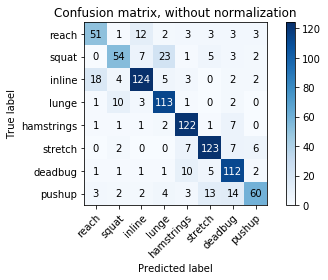

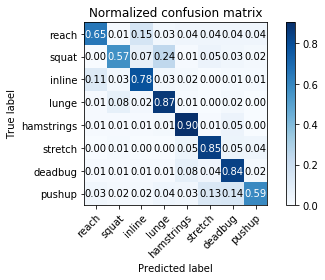

In [17]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(pl, gt, classes=label_map,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(pl, gt, classes=label_map, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [1]:
train_loader

NameError: name 'train_loader' is not defined